In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Dataset-SA.csv')
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.fillna(method='ffill')

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [ ]:
df.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sentiment']=label_encoder.fit_transform(df['Sentiment'])
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

# Drop rows with missing values in these columns
df.dropna(subset=['product_price', 'Rate', 'Sentiment_encoded'], inplace=True)
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment,product_name_encoded,Sentiment_encoded
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,super!,great cooler excellent air flow and for this p...,2,140,2
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,awesome,best budget 2 fit cooler nice cooling,2,140,2
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,fair,the quality is good but the power of air is de...,2,140,2
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,1.0,useless product,very bad product its a only a fan,0,140,0
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,fair,ok ok product,1,140,1


In [ ]:
X=df[['product_price','Rate','Sentiment_encoded']]

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42)

kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
df['Cluster']=kmeans.labels_
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment,product_name_encoded,Sentiment_encoded,Cluster
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,super!,great cooler excellent air flow and for this p...,2,140,2,0
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,awesome,best budget 2 fit cooler nice cooling,2,140,2,0
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,fair,the quality is good but the power of air is de...,2,140,2,0
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,1.0,useless product,very bad product its a only a fan,0,140,0,0
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,fair,ok ok product,1,140,1,0


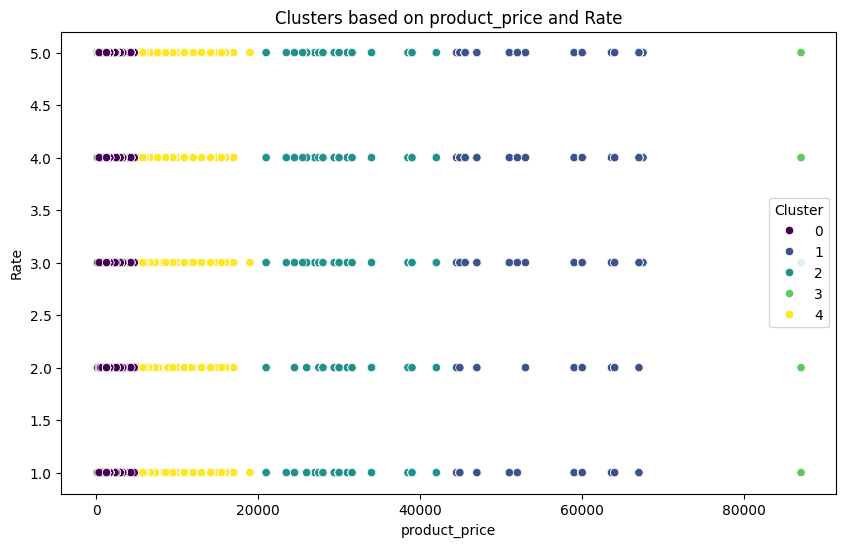

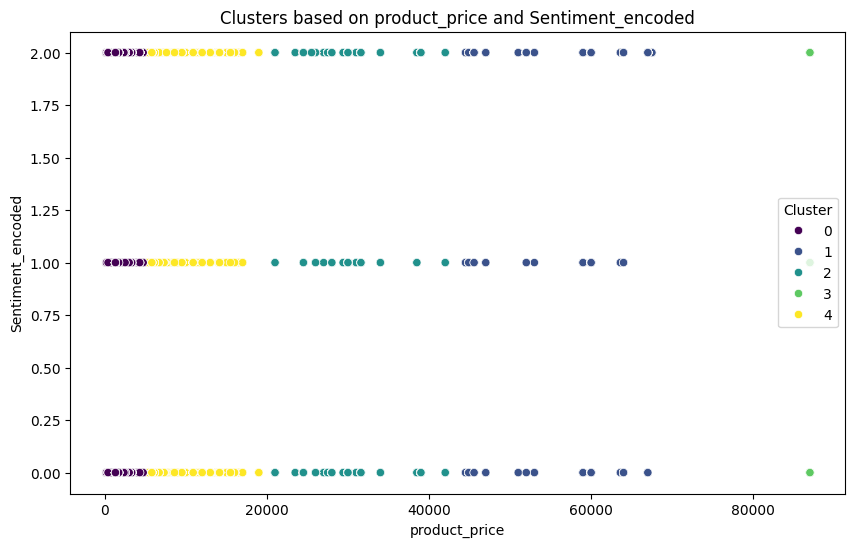

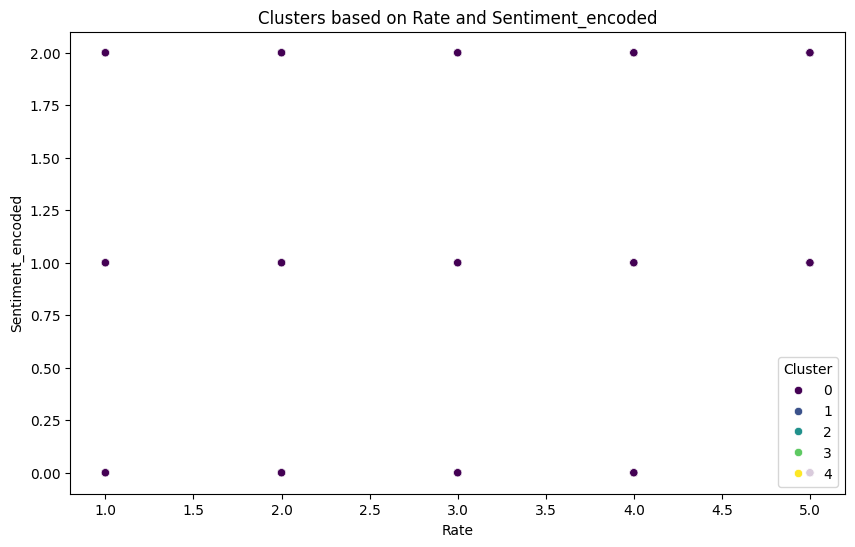

In [ ]:
import seaborn as sns
def plot_clusters(df, feature1, feature2, clusters):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature1, y=feature2, hue=clusters, palette='viridis', data=df)
    plt.title(f'Clusters based on {feature1} and {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(title='Cluster')
    plt.show()

# Plot clusters based on different feature pairs
plot_clusters(df, 'product_price', 'Rate', 'Cluster')
plot_clusters(df, 'product_price', 'Sentiment_encoded', 'Cluster')
plot_clusters(df, 'Rate', 'Sentiment_encoded', 'Cluster')


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(X, df['Cluster'])
print(f'Davies-Bouldin Index: {db_score}')


Davies-Bouldin Index: 0.34396644485590266
